# Parameter recovery of the DDM with starting point bias

In [1]:
from rlssm.random.random_DDM import simulate_ddm
from rlssm.model.models_DDM import DDModel

## Simulate individual data

In [2]:
data = simulate_ddm(
    n_trials=400, 
    gen_drift=.8, 
    gen_threshold=1.3, 
    gen_ndt=.23, 
    gen_rel_sp=.6)

In [3]:
data.describe()[['rt', 'accuracy']]

,rt,accuracy
count,400.000000,400.000000
mean,0.613583,0.852500
std,0.325006,0.355048
min,0.263000,0.000000
25%,0.381500,1.000000
50%,0.518500,1.000000
75%,0.746000,1.000000
max,2.204000,1.000000


## Initialize the model

In [4]:
model = DDModel(hierarchical_levels = 1, starting_point_bias=True)

14:06:09 - cmdstanpy - INFO - compiling stan file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias.stan to exe file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias
14:06:24 - cmdstanpy - INFO - compiled model executable: /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias
14:06:24 - cmdstanpy - WARNING - Stan compiler has produced 9 warnings:
14:06:24 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias.hpp /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias.stan
Warning in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias.stan', line 4, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/andre

## Fit

In [5]:
# sampling parameters
n_warmup = 1500
n_sampling = 1500
n_chains = 2
n_thin = 1

# bayesian model, change default priors:
drift_priors = {'mu':1, 'sd':3}
threshold_priors = {'mu':-1, 'sd':3}
ndt_priors = {'mu':-1, 'sd':1}

In [6]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

14:06:24 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 3}
threshold_priors {'mu': -1, 'sd': 3}
ndt_priors {'mu': -1, 'sd': 1}
rel_sp_priors {'mu': 0, 'sd': 0.8}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

14:06:48 - cmdstanpy - INFO - CmdStan done processing.
14:06:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: wiener_lpdf: Random variable  = 0.576, but must be greater than nondecision time = 0.665142 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias.stan', line 52, column 1 to column 54)
	Exception: wiener_lpdf: Random variable  = 0.312, but must be greater than nondecision time = 0.313945 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias.stan', line 52, column 1 to column 54)
	Exception: wiener_lpdf: Random variable  = 0.297, but must be greater than nondecision time = 0.307416 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias.stan', line 52, column 1 to column 54)
	Exception: wiener_lpdf: Random variable  = 0.312, but must be greater than nondecision time = 0.357634 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/DDM_bias.stan', line 52, column 1 to column 54)
	Exception: wiener_lpdf:


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 3000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 3000 iterations ended with a divergence (0.0%)


### get Rhat

In [7]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.001140,lp__
drift,1.001710,drift
threshold,0.999557,threshold
ndt,1.001130,ndt
rel_sp,1.003200,rel_sp
...,...,...
log_lik[396],1.000650,log_lik[396]
log_lik[397],1.000030,log_lik[397]
log_lik[398],1.000490,log_lik[398]


### calculate wAIC

In [8]:
model_fit.waic

{'lppd': -140.33926607294404,
 'p_waic': 3.6956692286428323,
 'waic': 288.06987060317374,
 'waic_se': 47.71193579144203}

## Posteriors

In [9]:
model_fit.samples.describe()

,transf_drift,transf_threshold,transf_ndt,transf_rel_sp
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.004250,1.401450,0.224317,0.573476
std,0.108733,0.039354,0.006790,0.021410
min,0.657066,1.259510,0.194524,0.489228
25%,0.929530,1.373913,0.220298,0.559158
50%,1.004775,1.400645,0.224729,0.574055
75%,1.080070,1.427590,0.228915,0.587583
max,1.441360,1.544400,0.243794,0.642592


In [10]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

Here we plot the estimated posterior distributions against the generating parameters, to see whether the model parameters are recovering well:

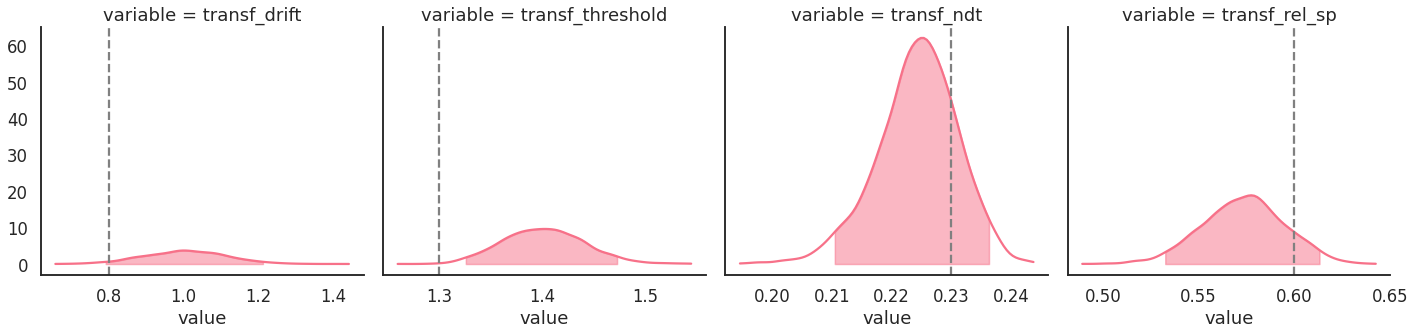

In [11]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

for i, ax in enumerate(g.axes.flatten()):
    ax.axvline(data[['drift', 'threshold', 'ndt', 'rel_sp']].mean().values[i], color='grey', linestyle='--')